# Linear Regression Model - Best Score

## Read in Files

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

In [111]:
#allows me to scroll (Credit to Andy)
pd.options.display.max_columns = 999
pd.options.display.max_rows = 100

In [112]:
df = pd.read_csv('../../datasets/train_featengin.csv')
df_test = pd.read_csv('../../datasets/test_featengin.csv')

#Allows me to put columns in alphabetical order (Credit to Andy)
df = df.reindex(sorted(df.columns), axis=1)
df_test = df_test.reindex(sorted(df_test.columns), axis=1)

df.drop(columns=['Unnamed: 0'], inplace=True)
df_test.drop(columns=['Unnamed: 0'], inplace=True)

df.head()

,1st_flr_and_total_bsmt_sqft,1st_flr_gr_liv_area_total_bsmt_sqft,1st_flr_sf,2nd_flr_sf,3ssn_porch,alley,baths,bedroom_abvgr,bldg_type,bsmt_cond,bsmt_exposure,bsmt_full_bath,bsmt_half_bath,bsmt_num,bsmt_qual,bsmt_unf_sf,bsmtfin_sf_1,bsmtfin_sf_2,bsmtfin_type_1,bsmtfin_type_2,central_air,condition_1,condition_2,condition_rank,deck_or_porch,electrical,enclosed_porch,exter_cond,exter_num,exter_qual,exterior_1st,exterior_2nd,fence,fireplace,fireplace_qu,fireplaces,foundation,full_bath,functional,garage_area,garage_cars,garage_cond,garage_finish,garage_qual,garage_space,garage_type,garage_yr_blt,gr_liv_area,half_bath,heating,heating_qc,house_style,id,kitchen_abvgr,kitchen_qual,land_contour,land_slope,lot_area,lot_config,lot_frontage,lot_shape,low_qual_fin_sf,mas_vnr_area,mas_vnr_type,misc_feature,misc_val,mo_sold,ms_subclass,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,neighborhood,neighborhood_rank,open_porch_sf,overall_cond,overall_qual,overall_qual_gr_liv_area,paved_drive,pid,pool_area,pool_qc,roof_matl,roof_style,sale_type,saleprice,screen_porch,sqft_above,street,total_bsmt_sf,totrms_abvgrd,utilities,wood_deck_sf,year_built,year_remod/add,yr_remod_or_built,yr_sold
0,525625.0,7.773994e+08,725,754,0,None,2.5,3,1Fam,3,No,0.0,0.0,9,3,192.0,533.0,0.0,GLQ,Unf,Y,1,2,2,0,SBrkr,0,3,12,4,HdBoard,Plywood,None,0,0,0,CBlock,2,7,475.0,2.0,3,RFn,3,950.0,Attchd,1976.0,1479,1,GasA,5,2Story,109,1,4,Lvl,Gtl,13517,CulDSac,68.0,IR1,0,289.0,BrkFace,None,0,3,60,0,0,0,0,1,0,Sawyer,9,44,8,6,8874,Y,533352170,0,1,CompShg,Gable,WD,130500,0,1072275,Pave,725.0,6,AllPub,0,1976,2005,3961880,2010
1,833569.0,1.768833e+09,913,1209,0,None,3.5,4,1Fam,3,No,1.0,0.0,12,4,276.0,637.0,0.0,GLQ,Unf,Y,2,2,4,0,SBrkr,0,3,12,4,VinylSd,VinylSd,None,3,3,1,PConc,2,7,559.0,2.0,3,RFn,3,1118.0,Attchd,1997.0,2122,1,GasA,5,2Story,544,1,4,Lvl,Gtl,11492,CulDSac,43.0,IR1,0,132.0,BrkFace,None,0,4,60,0,0,0,0,1,0,SawyerW,14,74,5,7,14854,Y,531379050,0,1,CompShg,Gable,WD,220000,0,1937386,Pave,913.0,8,AllPub,0,1996,1997,3986012,2009
2,1117249.0,1.180932e+09,1057,0,0,None,2.0,3,1Fam,3,No,1.0,0.0,9,3,326.0,731.0,0.0,GLQ,Unf,Y,2,2,4,0,SBrkr,0,4,12,3,VinylSd,VinylSd,None,0,0,0,CBlock,1,7,246.0,1.0,3,Unf,3,246.0,Detchd,1953.0,1057,0,GasA,3,1Story,153,1,4,Lvl,Gtl,7922,Inside,68.0,Reg,0,0.0,None,None,0,1,20,0,0,0,0,1,0,NAmes,12,52,7,5,5285,Y,535304180,0,1,CompShg,Gable,WD,109000,0,1117249,Pave,1057.0,5,AllPub,0,1953,2007,3919671,2010
3,285696.0,4.125450e+08,744,700,0,None,2.5,3,1Fam,3,No,0.0,0.0,12,4,384.0,0.0,0.0,Unf,Unf,Y,2,2,4,0,SBrkr,0,3,9,3,VinylSd,VinylSd,None,0,0,0,PConc,2,7,400.0,2.0,3,Fin,3,800.0,BuiltIn,2007.0,1444,1,GasA,4,2Story,318,1,3,Lvl,Gtl,9802,Inside,73.0,Reg,0,0.0,None,None,0,4,60,0,0,0,0,1,0,Timber,23,0,5,5,7220,Y,916386060,0,1,CompShg,Gable,WD,174000,0,1074336,Pave,384.0,7,AllPub,100,2006,2007,4026042,2010
4,561756.0,8.117374e+08,831,614,0,None,2.0,3,1Fam,4,No,0.0,0.0,8,2,676.0,0.0,0.0,Unf,Unf,Y,2,2,4,0,SBrkr,0,3,9,3,Wd Sdng,Plywood,None,0,0,0,PConc,2,7,484.0,2.0,3,Unf,3,968.0,Detchd,1957.0,1445,0,GasA,3,1.5Fin,255,1,3,Lvl,Gtl,14235,Inside,82.0,IR1,0,0.0,None,None,0,3,50,0,0,0,0,1,0,SawyerW,14,59,8,6,8670,N,906425045,0,1,CompShg,Gable,WD,138500,0,1200795,Pave,676.0,6,AllPub,0,1900,1993,3786700,2010


## Check Correlations to Determine Features to Use

In [113]:
df.corr()['saleprice'].sort_values(ascending = False)

saleprice                              1.000000
overall_qual_gr_liv_area               0.872971
overall_qual                           0.803462
sqft_above                             0.763701
1st_flr_gr_liv_area_total_bsmt_sqft    0.761354
neighborhood_rank                      0.720388
gr_liv_area                            0.719463
exter_qual                             0.715048
1st_flr_and_total_bsmt_sqft            0.699189
kitchen_qual                           0.694295
garage_space                           0.693907
total_bsmt_sf                          0.665116
garage_area                            0.655452
garage_cars                            0.648574
1st_flr_sf                             0.648252
baths                                  0.632542
yr_remod_or_built                      0.622972
bsmt_qual                              0.613236
bsmt_num                               0.601286
exter_num                              0.598104
year_built                             0

<AxesSubplot:>

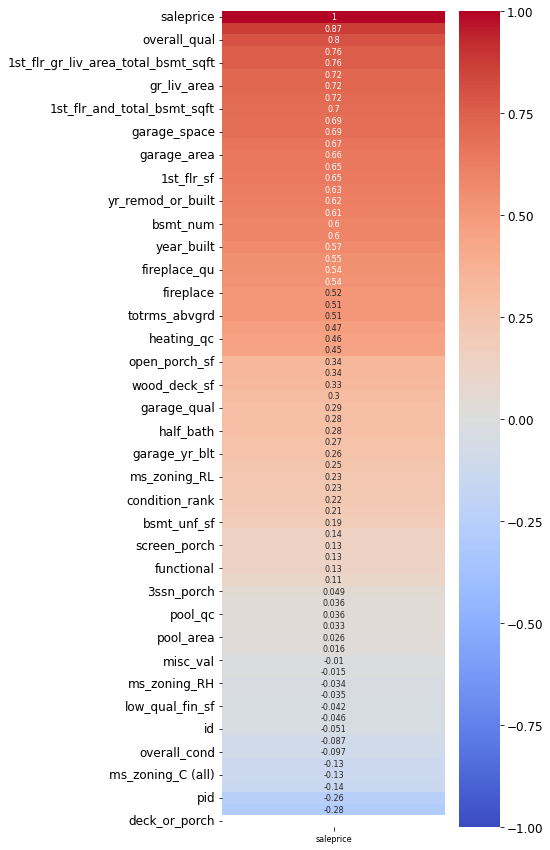

In [114]:
plt.figure(figsize = (5, 15))
sns.heatmap(df.corr()[['saleprice']].sort_values('saleprice', ascending = False), cmap = 'coolwarm', vmin = -1, vmax = 1, annot = True)

## Baseline Model

In [115]:
df['base'] = df['saleprice'].mean()

In [116]:
RMSE = np.sqrt(metrics.mean_squared_error(df['saleprice'], df['base']))
RMSE

79276.56098763691

The Baseline model has a Root Mean Squared Error of \\$79,277. On average the predicted sales price is about \\$79,277 off from the true sales price.

## Features

In [117]:
df['overall_qual_gr_liv_area'] = df['overall_qual_gr_liv_area'].map(np.log)
df_test['overall_qual_gr_liv_area'] = df_test['overall_qual_gr_liv_area'].map(np.log)

mszone_dum = [col for col in df.columns if 'ms_zoning' in col]

In [118]:
features = ['overall_qual', 
            'overall_qual_gr_liv_area', 
            'totrms_abvgrd',
            'neighborhood_rank', 
            'garage_space', 
            'yr_remod_or_built', 
            'functional', 
            'fireplaces', 
            'exter_cond',
            'lot_area', 
            'condition_rank',
            'exter_num', 
            'bsmt_num',
            'baths', 
            'kitchen_qual', 
            'deck_or_porch']
features.extend(mszone_dum)

X = df[features]
y = df['saleprice']

In [119]:
lr = LinearRegression()

In [120]:
cross_val_score(lr, X, y).mean()

0.8301682636366777

## Model Prep: Train/Test Split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 36)

In [122]:
y_train_log = y_train.map(np.log)
y_test_log = y_test.map(np.log)

In [123]:
cross_val_score(lr, X_train, y_train_log).mean()

0.8793100669245195

## Fitting Model and Scoring

In [124]:
lr.fit(X_train, y_train_log)

LinearRegression()

In [125]:
lr.score(X_train, y_train_log)

0.8880188576902772

In [126]:
lr.score(X_test, y_test_log)

0.8690664101753106

In [127]:
cross_val_score(lr, X_train, y_train_log).mean()

0.8793100669245195

Great in terms of low variance and farily good on bias. 

## Residuals

In [128]:
pred = lr.predict(X_test)

In [129]:
residuals = y_test_log - pred

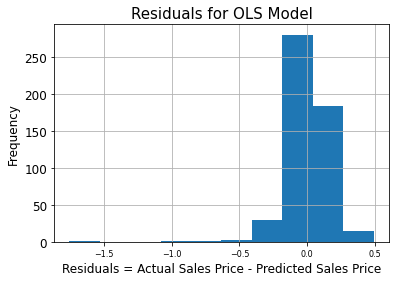

In [130]:
residuals.hist()
plt.title('Residuals for OLS Model')
plt.xlabel('Residuals = Actual Sales Price - Predicted Sales Price')
plt.ylabel('Frequency');

There are outliers on the low end as the residual's are skewed to the left. The center is located at 0 which is what we want to see as the residuals should center around 0 which is our irreducable error.

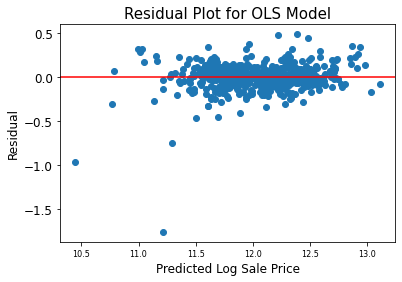

In [131]:
plt.scatter(pred, residuals)
plt.axhline(y = 0, color = 'r')
plt.title('Residual Plot for OLS Model')
plt.xlabel('Predicted Log Sale Price')
plt.ylabel('Residual');

There seems to be some bias due to the variance of the residuals.  Ignoring the outliers, the rest of the residual plot is fairly equal variance. 

In [132]:
pred_sale = np.exp(pred)

In [133]:
metrics.r2_score(y_test, pred_sale)

0.8816803560914284

In [134]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test, pred_sale))
RMSE

28552.5548111561

The Root Mean Squared Error says on average, the errors are about \\$28,552 off from the actual sale prices.

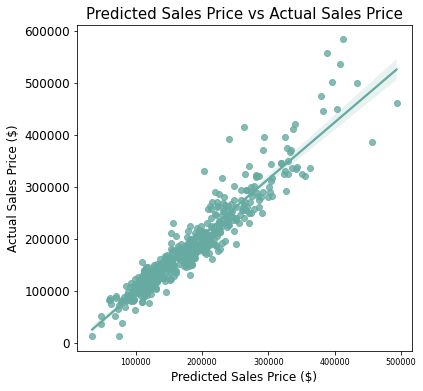

In [135]:
plt.figure(figsize = (6,6))
sns.regplot(x=pred_sale, y = y_test,color = '#66aaa2')
plt.title('Predicted Sales Price vs Actual Sales Price')
plt.xlabel('Predicted Sales Price ($)')
plt.ylabel('Actual Sales Price ($)');
plt.rc('axes', titlesize=15)
plt.rc('axes', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.savefig("../../images/ols_predicted_vs_actual_saleprice.jpg", bbox_inches="tight", dpi=100);

## Coefficients of Features

In [136]:
X.columns

Index(['overall_qual', 'overall_qual_gr_liv_area', 'totrms_abvgrd',
       'neighborhood_rank', 'garage_space', 'yr_remod_or_built', 'functional',
       'fireplaces', 'exter_cond', 'lot_area', 'condition_rank', 'exter_num',
       'bsmt_num', 'baths', 'kitchen_qual', 'deck_or_porch',
       'ms_zoning_C (all)', 'ms_zoning_FV', 'ms_zoning_I (all)',
       'ms_zoning_RH', 'ms_zoning_RL', 'ms_zoning_RM'],
      dtype='object')

In [137]:
ols_features = ['Overall Quality',
                'Overall Quality * Above Ground Living Area',
                'Total Rooms Above Ground', 
                'Neighborhood Rank',
                'Garage Space',
                'Year Built or Remodeled',
                'Functional', 
                'Fireplaces',
                'Exterior Condition',
                'Lot Area', 
                'Condition Ranks',
                'Exterior Quality * Exterior Quality',
                'Basement Quality * Basement Condition ',
                'Baths',
                'Kitchen Quality',
                'Deck or Porch',
                'Commerical Zone',
                'Floating Village Residental',
                'Industrial Zone',
                'Residental High Density',
                'Residental Low Density', 
                'Residential Medium Density']
lin_coef = pd.Series(lr.coef_, ols_features )
lin_coef

Overall Quality                               1.080240e-02
Overall Quality * Above Ground Living Area    3.122044e-01
Total Rooms Above Ground                      1.116162e-03
Neighborhood Rank                             7.079651e-03
Garage Space                                  6.258182e-05
Year Built or Remodeled                       3.242072e-07
Functional                                    3.660195e-02
Fireplaces                                    6.024370e-02
Exterior Condition                            1.390917e-02
Lot Area                                      4.735624e-06
Condition Ranks                               2.661528e-02
Exterior Quality * Exterior Quality           7.791827e-03
Basement Quality * Basement Condition         9.604470e-03
Baths                                         3.316463e-02
Kitchen Quality                               5.450602e-02
Deck or Porch                                -4.857226e-17
Commerical Zone                              -1.820601e-

In [138]:
lin_coefs = pd.Series(lin_coef, ols_features).sort_values(ascending = False)

In [139]:
lin_coefs

Overall Quality * Above Ground Living Area    3.122044e-01
Residental Low Density                        6.836579e-02
Residental High Density                       6.822283e-02
Fireplaces                                    6.024370e-02
Kitchen Quality                               5.450602e-02
Functional                                    3.660195e-02
Baths                                         3.316463e-02
Floating Village Residental                   3.306738e-02
Condition Ranks                               2.661528e-02
Residential Medium Density                    2.350274e-02
Exterior Condition                            1.390917e-02
Overall Quality                               1.080240e-02
Basement Quality * Basement Condition         9.604470e-03
Exterior Quality * Exterior Quality           7.791827e-03
Neighborhood Rank                             7.079651e-03
Total Rooms Above Ground                      1.116162e-03
Garage Space                                  6.258182e-

Because I used a log transformation, these are not interpretable for a general audience. Unable to convert back to dollars. But these features can be highlighted as those that have the most bang for the buck.

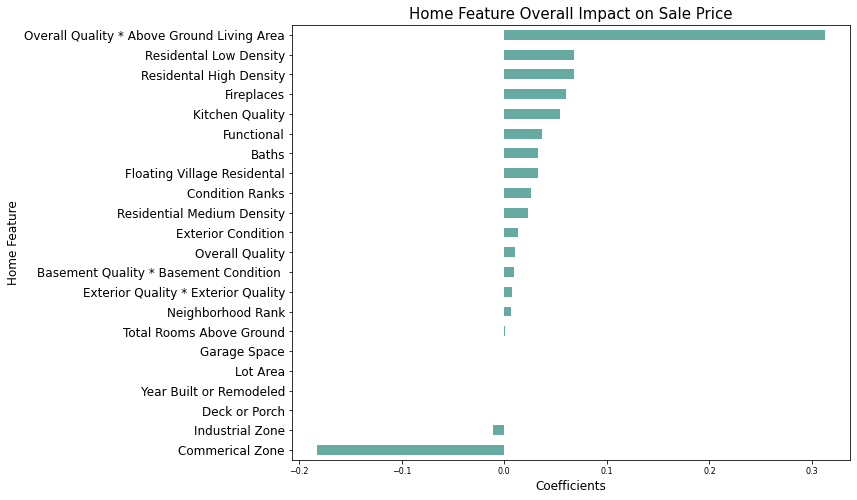

In [140]:
plt.figure(figsize=(10, 8))
lin_coefs.sort_values().plot.barh(color='#66aaa2')
plt.title('Home Feature Overall Impact on Sale Price')
plt.xlabel('Coefficients')
plt.ylabel('Home Feature')
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.savefig("../../images/ols_features_coef_barchart.jpg", bbox_inches="tight", dpi=100); #save as jpg

The features with the largest positive impact on sale price include the interaction item overall qual * gr liv area.  The location of the home being in a residental high density or low density neighbordhood has a larger impact on price. Features of the home that can be controlled in a Flip include number of fireplaces, overall quality, gr liv area, kitchen quality, and baths. 

## Set up Submission file for Kaggle.

In [141]:
pred_test = lr.predict(df_test[features])

In [142]:
pred_test.shape

(878,)

In [143]:
df_test['saleprice'] = np.exp(pred_test)

In [144]:
model13_submission = df_test[['id', 'saleprice']]
model13_submission.head()

,id,saleprice
0,2658,121982.718567
1,2718,160836.387286
2,2414,232177.049651
3,1989,109960.778350
4,625,175483.034708


In [145]:
model13_submission.set_index('id', inplace=True) 

In [146]:
model13_submission.to_csv('../../datasets/Model_submissions/model13_submission.csv') 

Saving a csv file with only the features used and the saleprice.

In [147]:
df_ols = df[features]
df_ols['saleprice'] = df['saleprice']
df_ols

/var/folders/8c/d71xvtx971706d0ttvg_stb80000gn/T/ipykernel_33804/191249552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ols['saleprice'] = df['saleprice']


,overall_qual,overall_qual_gr_liv_area,totrms_abvgrd,neighborhood_rank,garage_space,yr_remod_or_built,functional,fireplaces,exter_cond,lot_area,condition_rank,exter_num,bsmt_num,baths,kitchen_qual,deck_or_porch,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,saleprice
0,6,9.090881,6,9,950.0,3961880,7,0,3,13517,2,12,9,2.5,4,0,0,0,0,0,1,0,130500
1,7,9.606024,8,14,1118.0,3986012,7,1,3,11492,4,12,12,3.5,4,0,0,0,0,0,1,0,220000
2,5,8.572628,5,12,246.0,3919671,7,0,4,7922,4,12,9,2.0,4,0,0,0,0,0,1,0,109000
3,5,8.884610,7,23,800.0,4026042,7,0,3,9802,4,9,12,2.5,3,0,0,0,0,0,1,0,174000
4,6,9.067624,6,14,968.0,3786700,7,0,3,14235,4,9,8,2.0,3,0,0,0,0,0,1,0,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044,8,9.534161,7,23,1040.0,4028049,7,1,3,11449,4,12,12,3.0,4,0,0,0,0,0,1,0,298751
2045,4,8.144389,4,6,1078.0,3783000,7,0,3,12342,4,9,9,1.0,3,0,0,0,0,0,1,0,82500
2046,6,9.348187,9,20,684.0,3759600,7,1,3,7558,4,9,9,1.5,3,0,0,0,0,0,1,0,177000
2047,4,8.476371,6,12,294.0,3825936,7,2,3,10400,4,9,9,2.0,3,0,0,0,0,0,1,0,144000


In [148]:
df_ols.to_csv('../../datasets/Model_submissions/train_ols.csv') 